In [64]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import matplotlib.pyplot as plt

In [65]:
#Hacemos Web Scrapping y obtenemos el html
direccion="https://www.flat.mx/venta/propiedades-en-ciudad-de-mexico"
pagina=requests.get(direccion)
sopa=BeautifulSoup(pagina.content,"html.parser")
#print(sopa.prettify())

In [66]:
datos=sopa.find_all('p',class_="flex items-center gap-[0.625rem] truncate font-montserrat text-sm font-bold tabular-nums text-emerald md:text-base")
#print(datos)

In [67]:
print(type(datos))

<class 'bs4.element.ResultSet'>


In [68]:
#Guardamos los precios en una lista
precios=list()
for x in datos:
    precios.append(x.text)
precios

['$2,550,000',
 '$4,900,000',
 '$3,800,000',
 '$3,895,000',
 '$2,395,000',
 '$3,240,000',
 '$3,600,000',
 '$5,400,000',
 '$6,500,000',
 '$7,595,000$7,995,000 6%',
 '$1,000,000',
 '$3,907,209',
 '$2,280,000',
 '$4,195,000$4,395,000 5%',
 '$5,295,000',
 '$3,545,000$3,595,000 2%',
 '$4,500,000',
 '$1,280,000',
 '$1,730,000',
 '$3,200,000']

In [69]:
#Verificamos que el tipo de dato que contiene precios es string
print(type(precios[0]))

<class 'str'>


In [70]:
#Hacemos una limpieza de datos manual
precios[9]='$7,595,000'
precios[13]='$4,195,000'
precios[15]='$3,545,000'
precios

['$2,550,000',
 '$4,900,000',
 '$3,800,000',
 '$3,895,000',
 '$2,395,000',
 '$3,240,000',
 '$3,600,000',
 '$5,400,000',
 '$6,500,000',
 '$7,595,000',
 '$1,000,000',
 '$3,907,209',
 '$2,280,000',
 '$4,195,000',
 '$5,295,000',
 '$3,545,000',
 '$4,500,000',
 '$1,280,000',
 '$1,730,000',
 '$3,200,000']

In [71]:
#Convertimos de string a int los precios
for x in range(len(precios)):
  precios[x]= precios[x].replace('$', '')
  precios[x]= precios[x].replace(',', '')
  precios[x] = int(precios[x])
precios

[2550000,
 4900000,
 3800000,
 3895000,
 2395000,
 3240000,
 3600000,
 5400000,
 6500000,
 7595000,
 1000000,
 3907209,
 2280000,
 4195000,
 5295000,
 3545000,
 4500000,
 1280000,
 1730000,
 3200000]

In [72]:
#Obtenemos el html de los tamaños
datos=sopa.find_all ('span', class_="ml-2 truncate font-montserrat text-xs font-bold tabular-nums text-black")
#print(datos)

In [73]:
#Guardamos los tamaños en una lista
tamaños=[]
for x in datos:
  z=x.text
  if('m²' in z):
    tamaños.append(z)
tamaños

['144 m²',
 '335 m²',
 '220 m²',
 '82 m²',
 '69 m²',
 '127 m²',
 '83 m²',
 '243 m²',
 '185 m²',
 '280 m²',
 '49 m²',
 '114 m²',
 '80 m²',
 '119 m²',
 '129 m²',
 '82 m²',
 '180 m²',
 '74 m²',
 '59 m²',
 '117 m²']

In [74]:
#Convertimos los tamaños de string a int
for i in range(len(tamaños)):
  tamaños[i]=int(tamaños[i].replace('m²', ''))
tamaños

[144,
 335,
 220,
 82,
 69,
 127,
 83,
 243,
 185,
 280,
 49,
 114,
 80,
 119,
 129,
 82,
 180,
 74,
 59,
 117]

In [75]:
#Obtenemos el html de los baños
datos = sopa.find_all('p', class_="flex flex-shrink-0 flex-nowrap items-center") 
#convertimos el html a string para utilizar la funcion 'in'
datos=str(datos)
#print(datos)
print('baños' in datos)

True


In [76]:
#Econtramos la posicion del primer baño, así que crearemos un ciclo para encontrar todos los baños
pos=datos.find('baño')
print(pos)
print(datos[pos-2:pos+5])

1616
2 baños


In [77]:
baños=[]
while(datos.find('baño')!=-1):
  pos=datos.find('baño')
  baños.append(int(datos[pos-2]))
  datos=datos.replace(datos[0:pos+4],'')
#print(datos)
baños

[2, 3, 3, 2, 1, 3, 2, 3, 2, 4, 1, 1, 1, 2, 2, 2, 1, 1, 1, 3]

In [78]:
print(len(precios))
print(len(tamaños))
print(len(baños))

20
20
20


In [79]:
#Sacamos correlación entre baños, tamaño y precio
ByP=np.corrcoef(baños, precios)
TyP=np.corrcoef(tamaños, precios)
print(ByP)
print(TyP)

[[1.         0.63766274]
 [0.63766274 1.        ]]
[[1.         0.73602405]
 [0.73602405 1.        ]]


In [80]:
#Vemos que la correlacion entre tamaño y precio es mayor, así que sacamos la correlación lineal

sx=0
sy=0
sx2=0
sxy=0
n=len(precios)

for i in range(n):
  sx+=tamaños[i]
  sy+=precios[i]
  sx2+=tamaños[i]**2
  sxy+=tamaños[i]*precios[i]

m=(sxy - ((sx*sy)/n)) / (sx2 - ((sx**2)/n))
a=((n*sxy)-(sx*sy)) / ((n*sx2) - (sx**2))
print(m, a)

bclase=precios[15]-(m*tamaños[15])
bgoogle=(sy-(a*sx))/n
print(bclase, bgoogle)

15657.488680124025 15657.488680124034
2261085.92822983 1571015.3933688153


In [81]:
#Creamos la regresión lineal
yclase=[]
ygoogle=[]
for i in range(n):
  yclase.append(m*tamaños[i]+bclase)
  ygoogle.append(a*tamaños[i]+bgoogle)

print(yclase)
print(ygoogle)

[4515764.29816769, 7506344.636071378, 5705733.437857116, 3545000.0, 3341452.647158388, 4249586.990605582, 3560657.4886801243, 6065855.677499969, 5157721.334052775, 6645182.758664557, 3028302.8735559075, 4046039.637763969, 3513685.0226397524, 4124327.081164589, 4280901.967965829, 3545000.0, 5079433.890652155, 3419740.090559008, 3184877.7603571475, 4093012.103804341]
[3825693.7633066764, 6816274.101210366, 5015662.902996102, 2854929.465138986, 2651382.112297374, 3559516.4557445673, 2870586.95381911, 5375785.142638955, 4467650.799191762, 5955112.223803544, 2338232.338694893, 3355969.1029029554, 2823614.487778738, 3434256.5463035754, 3590831.433104816, 2854929.465138986, 4389363.355791141, 2729669.555697994, 2494807.2254961333, 3402941.5689433273]


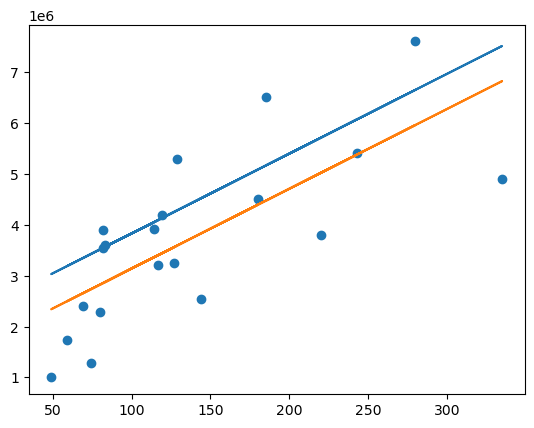

In [82]:
plt.scatter(tamaños, precios)
plt.plot(tamaños, yclase)
plt.plot(tamaños, ygoogle)